In [43]:
from requests import session
from bs4 import BeautifulSoup as bs
import json
import re
import math
import pandas as pd

#USER = 'sonyyt@gmail.com'
#PASSWORD = 'CIS236@umdearborn'

USER = 'xxx'
PASSWORD = 'xxx'

URL1 = 'https://github.com/session'
URL2 = 'https://github.com/search?q=X-RapidAPI-Host&type=code&p={}'


with session() as s:
                  
    req = s.get(URL1).text
    html = bs(req)
    token = html.find("input", {"name": "authenticity_token"}).attrs['value']
    com_val = html.find("input", {"name": "commit"}).attrs['value']        

    login_data = {'login': USER,
                  'password': PASSWORD,
                  'commit' : com_val,
                  'authenticity_token' : token}
                      
    r1 = s.post(URL1, data = login_data)
 

In [16]:
r2 = s.get(URL2.format(1))  # Fetch the first page of the search results
hostnames = []
consolidated_text = []
for page in range(1, 6):  # Iterate from 1 to 5 (including 1, excluding 6)
    url = URL2.format(page)
    print(url)
    response = s.get(url)
    content = response.text
    html = ''.join(content)
    pattern = r"([^;:>/]+\.rapidapi\.com)"
    matches = re.findall(pattern, html)
    matches = [match.strip() for match in matches]
    matches = list(set(matches))  # Convert matches to a list of unique values
    hostnames.extend(matches)  # Use extend instead of append to add individual hostnames to the list
    consolidated_text.append(content)

html1 = ''.join(consolidated_text)    
pattern1 = r'"repo_nwo":"([^"]+)"'
matches1 = re.findall(pattern1, html1)
repo_nwos = []
for match in matches1:
    repo_nwos.append("https://github.com/" + match)
print(repo_nwos)   
hostname_counts = {}

for hostname in hostnames:
    if hostname in hostname_counts:
        hostname_counts[hostname] += 1
    else:
        hostname_counts[hostname] = 1



https://github.com/search?q=X-RapidAPI-Host&type=code&p=1
https://github.com/search?q=X-RapidAPI-Host&type=code&p=2
https://github.com/search?q=X-RapidAPI-Host&type=code&p=3
https://github.com/search?q=X-RapidAPI-Host&type=code&p=4
https://github.com/search?q=X-RapidAPI-Host&type=code&p=5
['https://github.com/OpenBB-finance/OpenBBTerminal', 'https://github.com/tehcoderer/OpenBBTerminal', 'https://github.com/dominictayloruk/OpenBBTerminal', 'https://github.com/deeleeramone/OpenBBTerminal', 'https://github.com/kulbinderdio/OpenBBTerminal', 'https://github.com/imClumsyPanda/langchain-ChatGLM', 'https://github.com/wordweb/langchain-ChatGLM-and-TigerBot', 'https://github.com/RayWang99/langchain-ChatGLM', 'https://github.com/SmileSmith/langchain-ChatGLM', 'https://github.com/lwjjike/langchain-ChatGLM', 'https://github.com/tone-row/flowchart-fun', 'https://github.com/sthagen/tone-row-flowchart-fun', 'https://github.com/Jxck-S/plane-notify', 'https://github.com/data-to-keep/plane-notify', 'htt

In [6]:
import requests
import re
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException


options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode, without opening a window

user_data_dir = r'C:\Users\siddh\AppData\Local\Google\Chrome\User Data'

webdriver_path = 'D:\chromedriver_win32\chromedriver.exe'  # Replace with the actual path to the chromedriver executable

options.add_argument(f'--user-data-dir={user_data_dir}')

driver = webdriver.Chrome(executable_path=webdriver_path, options=options)

wait_time = 10  # Wait time in seconds

git_details = {}
for repo_nwo in repo_nwos:
    print(repo_nwo)
    driver.get(repo_nwo)
    
    try:
        # Wait for the watchers element to be present
        watchers_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, "repo-notifications-counter")))
        # Extract the value from the element
        watchers = watchers_element.text.strip()
        watchers =int(watchers)
    except TimeoutException:
        watchers = "Not Found"

    try:
        # Wait for the forks element to be present
        forks_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, "repo-network-counter")))
        # Extract the value from the element
        forks = forks_element.text.strip()
        if 'k' in forks:
            # Remove the 'k' suffix
            forks = forks.replace('k', '')
            # Convert to float
            forks = float(forks)
            # Multiply by 1000 to get the full number
            forks = int(forks * 1000)
        else:
            forks = int(forks)
    except TimeoutException:
        forks = "Not Found"

    try:
        # Wait for the stars element to be present
        stars_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, "repo-stars-counter-star")))
        # Extract the value from the element
        stars = stars_element.text.strip()
        if 'k' in stars:
            # Remove the 'k' suffix
            stars = stars.replace('k', '')
            # Convert to float
            stars = float(stars)
            # Multiply by 1000 to get the full number
            stars = int(stars * 1000)
        else:
            stars =int(stars)
    except TimeoutException:
        stars = "Not Found"

    git_details[repo_nwo] = {
        'watchers': watchers,
        'forks': forks,
        'stars': stars
    }

# Print the extracted values
print(git_details)

# Quit the ChromeDriver instance
driver.quit()


https://github.com/OpenBB-finance/OpenBBTerminal
https://github.com/tehcoderer/OpenBBTerminal
https://github.com/dominictayloruk/OpenBBTerminal
https://github.com/deeleeramone/OpenBBTerminal
https://github.com/kulbinderdio/OpenBBTerminal
https://github.com/imClumsyPanda/langchain-ChatGLM
https://github.com/wordweb/langchain-ChatGLM-and-TigerBot
https://github.com/RayWang99/langchain-ChatGLM
https://github.com/SmileSmith/langchain-ChatGLM
https://github.com/lwjjike/langchain-ChatGLM
https://github.com/tone-row/flowchart-fun
https://github.com/sthagen/tone-row-flowchart-fun
https://github.com/Jxck-S/plane-notify
https://github.com/data-to-keep/plane-notify
https://github.com/bell-kevin/aircraft-notify
https://github.com/makrsmark/plane-notify
https://github.com/alpkeskin/mosint
https://github.com/sec-js/mosint
https://github.com/security-geeks/mosint
https://github.com/xiangsx/gpt4free-ts
https://github.com/mehdinr78/gpt4free-ts
https://github.com/Rubiobernal/gpt4free-ts
https://github.c

https://github.com/aaronpoweruser/Noteplan-plugins
https://github.com/KimMachineGun/plugins
https://github.com/shawnhank/plugins-1
https://github.com/akrabat/plugins
https://github.com/TerminalWarlord/TikTok-Downloader-Bot
https://github.com/djsaikrishna/TikTok-Downloader-Bot
https://github.com/silentdevnull/TikTok-Downloader-Bot
https://github.com/djsaikrishna/TikTok-dococ
https://github.com/rahulmanjhu2/TikTok-Downloader-Bot
https://github.com/blargbot/blargbot
https://github.com/CyberPunkMetalHead/bitcoin-bot-buy-if-elon-tweets
https://github.com/MikeYEG/bitcoin-bot-buy-if-elon-tweets
https://github.com/Exoid/bitcoin-bot-buy-if-elon-tweets
https://github.com/kaichancoder/bitcoin-bot-buy-if-elon-tweets
https://github.com/jonpaulh/bitcoin-bot-buy-if-elon-tweets
https://github.com/j471n/j471n.in
https://github.com/pranjay-poddar/Dev-Geeks
https://github.com/jfmartinz/Dev-Geeks
https://github.com/Anshul439/Dev-Geeks
https://github.com/Atharvashirsh/Dev-Geeks
https://github.com/sanamsayu

In [11]:
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Prepare the SQL statement for the insert operation
insert_git_details = "INSERT INTO github_details (repository_name, watcher, forks, stars) VALUES (%s, %s, %s, %s)"

# Iterate over the items in the api_details dictionary
for base_url, details in git_details.items():
    watcher = details['watchers']
    forks = details['forks']
    stars = details['stars']

    # Check if URL already exists in the database
    select_query = "SELECT repository_name FROM github_details WHERE repository_name = %s"
    cursor.execute(select_query, (base_url,))
    existing_url = cursor.fetchone()

    if existing_url:
        print(f"URL {base_url} already exists in the database. Skipping insertion.")
    else:
        # Execute the insert operation for each URL and details
        cursor.execute(insert_git_details, (base_url, watcher, forks, stars))

# Commit the changes and close the connection
cnx.commit()
cnx.close()

In [8]:
import re
import mysql.connector
from urllib.parse import urlparse


hostnames=[]
# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()
select_query = "SELECT hostname from api_info"

cursor.execute(select_query)
 
results = cursor.fetchall()
for result in results:
    hostnames.append(result[0])
print(hostnames)
cnx.close()

['jobsearch4.p.rapidapi.com', 'indeed-jobs-api-sweden.p.rapidapi.com', 'remote-jobs-api.p.rapidapi.com', 'indeed-jobs-api-finland.p.rapidapi.com', 'open-to-work-remote-api.p.rapidapi.com', 'upwork-api2.p.rapidapi.com', 'linkedin-jobs-python-developer.p.rapidapi.com', 'indeed-jobs-api.p.rapidapi.com', 'random-gradient-resume-template-generator.p.rapidapi.com', 'jobspider-resumes.p.rapidapi.com', 'upwork-jobs-api1.p.rapidapi.com', 'xosomientrung.p.rapidapi.com', 'linkedin-job1.p.rapidapi.com', 'estset.p.rapidapi.com', 'domains-records.p.rapidapi.com', 'netdetective.p.rapidapi.com', 'sus-guru-malicious-website-ai-detector-api.p.rapidapi.com', 'tweetfeed.p.rapidapi.com', 'ip-threat-lookup.p.rapidapi.com', 'whipcode.p.rapidapi.com', 'xss-shield.p.rapidapi.com', 'scam-fraud-data.p.rapidapi.com', 'gre-geoip.p.rapidapi.com', 'apikey01.p.rapidapi.com', 'rungutan-fastest-load-tester-in-the-jungle.p.rapidapi.com', 'data-hound.p.rapidapi.com', 'tes130.p.rapidapi.com', 'zorrosign-esign.p.rapidapi.c

In [41]:
import requests
import re
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from urllib.parse import urlparse, parse_qs

options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode, without opening a window

user_data_dir = r'C:\Users\siddh\AppData\Local\Google\Chrome\User Data'
webdriver_path = 'D:\chromedriver_win32\chromedriver.exe'  # Replace with the actual path to the chromedriver executable

options.add_argument(f'--user-data-dir={user_data_dir}')

driver = webdriver.Chrome(executable_path=webdriver_path, options=options)

wait_time = 5
git_details = {} 
for hostname in hostnames:
    driver.get("https://github.com/search?q="+hostname+"&type=code")
    try:
        hostname_count = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.CLASS_NAME, "Box-sc-g0xbh4-0.cgQapc")))

        # Get the text content of the element
        hostname_count_text = hostname_count.text

        # Extract the number "9" from the text
        hostname_count = hostname_count_text.split()[0]

        git_details[hostname] = {
            'hostname_count': hostname_count
        }

    except TimeoutException:
        hostname_count = "Not Found"
# Close the driver when you're done
driver.quit()
# Print the result dictionary
print(git_details)


{'fiscalite-lu.p.rapidapi.com': {'hostname_count': '0'}, 'messages-generation-tool.p.rapidapi.com': {'hostname_count': '0'}, 'amazon-scraper15.p.rapidapi.com': {'hostname_count': '0'}, 'scandocflow.p.rapidapi.com': {'hostname_count': '0'}, 'mac.p.rapidapi.com': {'hostname_count': '0'}, 'community-background-burner.p.rapidapi.com': {'hostname_count': '0'}, 'uriel_test.p.rapidapi.com': {'hostname_count': '0'}}


In [42]:
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Prepare the SQL statement for the insert operation
insert_git_info = "INSERT INTO github_info (hostname, hostname_count) VALUES (%s, %s)"

# Iterate over the items in the api_details dictionary
for hostname, details in git_details.items():
    if 'k' in details['hostname_count']:
            # Remove the 'k' suffix
            details['hostname_count'] = details['hostname_count'].replace('k', '')
            # Convert to float
            details['hostname_count'] = float(details['hostname_count'])
            # Multiply by 1000 to get the full number
            details['hostname_count'] = int(details['hostname_count'] * 1000)
    if details['hostname_count'] == 'More':
        hostname_count =0;
    else:
        hostname_count = int(details['hostname_count'])
    # Check if URL already exists in the database
    select_query = "SELECT hostname FROM github_info WHERE hostname = %s"
    cursor.execute(select_query, (hostname,))
    existing_url = cursor.fetchone()

    if existing_url:
        print(f"URL {hostname} already exists in the database. Skipping insertion.")
    else:
        # Execute the insert operation for each URL and details
        cursor.execute(insert_git_info, (hostname, hostname_count))

# Commit the changes and close the connection
cnx.commit()
cnx.close()

In [102]:
import re
import mysql.connector
from urllib.parse import urlparse


hostnames=[]
# Connect to MySQL
cnx = mysql.connector.connect(
    host='141.215.80.233',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()
select_query = "SELECT hostname from github_info where hostname_count>0"

cursor.execute(select_query)
 
results = cursor.fetchall()
for result in results:
    hostnames.append(result[0])
print(hostnames)
cnx.close()

['feroeg-reverse-geocoding.p.rapidapi.com', 'taxi-fare-calculator.p.rapidapi.com', 'crypto-news-live9.p.rapidapi.com']


In [103]:
import re
import time
import random

repo_nwos = {}
for hostname in hostnames:
    URL3 = "https://github.com/search?q=" + hostname + "&type=code"
    r2 = s.get(URL3.format(1))  # Fetch the first page of the search results
    consolidated_text = []
    for page in range(1, 6):  # Iterate from 1 to 5 (including 1, excluding 6)
        url = URL3.format(page)
        response = s.get(url)
        content = response.text
        html = ''.join(content)
        consolidated_text.append(content)
    html1 = ''.join(consolidated_text)
    pattern1 = r'"repo_nwo":"([^"]+)"'
    matches1 = re.findall(pattern1, html1)

    repo_urls = []
    for match in matches1:
        repo_url = "https://github.com/" + match
        if repo_url not in repo_urls:  # Check if the URL already exists in the list
            repo_urls.append(repo_url)
    repo_nwos[hostname] = repo_urls

    time.sleep(random.randint(5, 8))
print(repo_nwos)


{'feroeg-reverse-geocoding.p.rapidapi.com': [], 'taxi-fare-calculator.p.rapidapi.com': [], 'crypto-news-live9.p.rapidapi.com': []}


In [99]:
import re
import mysql.connector
from urllib.parse import urlparse


# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Insert non-empty hostnames and URLs into a table
insert_query = "INSERT INTO github_details (hostname, repository_name ) VALUES (%s, %s)"

for hostname, urls in repo_nwos.items():
    if urls:
        for url in urls:
            cursor.execute(insert_query, (hostname, url))

cnx.commit()

cnx.close()


In [7]:
import re
import mysql.connector
from urllib.parse import urlparse


repos=[]
# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()
select_query = "select repository_name from github_details"

cursor.execute(select_query)
 
results = cursor.fetchall()
for result in results:
    repos.append(result[0])
print(repos)
cnx.close()

['https://github.com/lasse1900/libraries_for_scraping', 'https://github.com/lasse1900/libraries_for_scraping', 'https://github.com/lasse1900/libraries_for_scraping', 'https://github.com/Elijah-Kariuki/IndeedJobs', 'https://github.com/sukeesh/Jarvis', 'https://github.com/joeblankenship1/Jarvis', 'https://github.com/iyogeshjoshi/Jarvis', 'https://github.com/chaitanyakasaraneni/Jarvis', 'https://github.com/devraj4522/Jarvis', 'https://github.com/heertheeswaran/Jarvis', 'https://github.com/cclauss/Jarvis', 'https://github.com/pranavnt/Jarvis', 'https://github.com/binoy638/Jarvis', 'https://github.com/prashantsingh2408/Jarvis-1', 'https://github.com/OpenWeek/Jarvis', 'https://github.com/baronrustamov/Jarvis-1', 'https://github.com/alexhaislip/Jarvis', 'https://github.com/KDSGYT/Jarvis', 'https://github.com/kmaqsudi/Jarvis', 'https://github.com/MrrPerfect/Jarvis', 'https://github.com/WildCodeSchool/P2-Angular-Squad-Lyon-Angular-Mars-2021', 'https://github.com/dylandpowers/sports-cli', 'https

In [152]:
import requests
import re
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException


options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode, without opening a window

user_data_dir = r'C:\Users\siddh\AppData\Local\Google\Chrome\User Data'

webdriver_path = 'D:\chromedriver_win32\chromedriver.exe'  # Replace with the actual path to the chromedriver executable

options.add_argument(f'--user-data-dir={user_data_dir}')

driver = webdriver.Chrome(executable_path=webdriver_path, options=options)

wait_time = 5  # Wait time in seconds

git_details = {}
for repo_nwo in repos:
    print(repo_nwo)
    driver.get(repo_nwo)
    
   # try:
        # Wait for the watchers element to be present
     #   watchers_element = WebDriverWait(driver, wait_time).until(EC.visibility_of_element_located((By.ID, "repo-notifications-counter")))
        # Extract the value from the element
     #   watchers = watchers_element.text.strip()
     #   watchers =int(watchers)
   # except TimeoutException:
     #   watchers = "Not Found"

    try:
        # Wait for the forks element to be present
        forks_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, "repo-network-counter")))
        # Extract the value from the element
        forks = forks_element.text.strip()
        if 'k' in forks:
            # Remove the 'k' suffix
            forks = forks.replace('k', '')
            # Convert to float
            forks = float(forks)
            # Multiply by 1000 to get the full number
            forks = int(forks * 1000)
        else:
            forks = int(forks)
    except (TimeoutException, NoSuchElementException):
        forks = "Not Found"

    try:
        # Wait for the stars element to be present
        stars_element = WebDriverWait(driver, wait_time).until(EC.presence_of_element_located((By.ID, "repo-stars-counter-star")))
        # Extract the value from the element
        stars = stars_element.text.strip()
        if 'k' in stars:
            # Remove the 'k' suffix
            stars = stars.replace('k', '')
            # Convert to float
            stars = float(stars)
            # Multiply by 1000 to get the full number
            stars = int(stars * 1000)
        else:
            stars =int(stars)
    except (TimeoutException, NoSuchElementException):
        stars = "Not Found"
    try:
        commit_element = driver.find_element(By.CSS_SELECTOR, 'span.d-none.d-sm-inline strong')
        commits = commit_element.text
    except (TimeoutException, NoSuchElementException):
        commits = "Not Found"  
    try:
        last_updated_element = driver.find_element(By.TAG_NAME, 'relative-time')
        last_updated = last_updated_element.get_attribute('innerHTML')
    except (TimeoutException, NoSuchElementException):
        last_updated = "Not Found"  

    git_details[repo_nwo] = {
        #'watchers': watchers,
        'forks': forks,
        'stars': stars,
        'commits': commits,
        'last_updated': last_updated
    }

# Print the extracted values
print(git_details)

# Quit the ChromeDriver instance
driver.quit()


https://github.com/Match-Color
https://github.com/maniacs-m
https://github.com/BrightSoftwares
https://github.com/curedao
https://github.com/equilcode
https://github.com/CleverProgrammers
https://github.com/OPcryptoApp
https://github.com/CBASoftwareDevolopment2020
https://github.com/ICEI-PUC-Minas-PMV-ADS
https://github.com/pdf4me
https://github.com/C-RISE-Inc
https://github.com/WildMouseAust
https://github.com/future4code
https://github.com/skedaddle-llc
https://github.com/compose-ai
https://github.com/IUS-CS
https://github.com/RizalDev7
https://github.com/vuvuvu997
https://github.com/GeneracYTS
https://github.com/JuliaGeo
https://github.com/skydropx-b-side
https://github.com/Orace-Smile
https://github.com/areaseb
https://github.com/emopy
https://github.com/theserafinski
https://github.com/dreamteci
https://github.com/myitedu
https://github.com/Full-Stack-Fluency
https://github.com/Edulab-NLP
https://github.com/nogibjj
https://github.com/cran
https://github.com/leafvest
https://github

KeyboardInterrupt: 

In [219]:
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Prepare the SQL statement for the update operation
update_git_details = "UPDATE github_details SET forks = %s, stars = %s, commits = %s, last_updated = %s WHERE repository_name = %s"

# Iterate over the items in the git_details dictionary
for base_url, details in git_details.items():
    forks = details['forks'] if details['forks'] != 'Not Found' else -1
    stars = details['stars'] if details['stars'] != 'Not Found' else -1
    commits = details['commits'].replace(",", "") if details['commits'] != 'Not Found' else -1
    last_updated = details['last_updated'] if details['last_updated'] != 'Not Found' else ''
    cursor.execute(update_git_details, (forks, stars, commits, last_updated, base_url))

# Commit the changes and close the connection
cnx.commit()
cnx.close()


In [191]:
import requests
import re
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException


options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode, without opening a window

user_data_dir = r'C:\Users\siddh\AppData\Local\Google\Chrome\User Data'

webdriver_path = 'D:\chromedriver_win32\chromedriver.exe'  # Replace with the actual path to the chromedriver executable

options.add_argument(f'--user-data-dir={user_data_dir}')

driver = webdriver.Chrome(executable_path=webdriver_path, options=options)

wait_time = 5  # Wait time in seconds

git_details = {}
for repo_nwo in repos:
    repo_nwo = "/".join(repo_nwo.split("/")[:4])
    print(repo_nwo)
    driver.get(repo_nwo)
    try:
        link_element = driver.find_element_by_xpath("//a[contains(@class, 'Link--primary')]")
        achievements_link = link_element.get_attribute("href")
    except (TimeoutException, NoSuchElementException):
        achievements_link = "Not Found"
    try:
        counter_element = driver.find_element(By.CSS_SELECTOR, 'span.Counter')
        repositories = counter_element.text.strip()

    except NoSuchElementException:
        repositories = "Not Found"
    
    try:
        span_element = driver.find_element_by_xpath('//span[@class="text-bold color-fg-default"]')
        followers = span_element.text.strip()

    except NoSuchElementException:
        followers = "Not Found"
    git_details[repo_nwo] = {
        #'watchers': watchers,
        'achievements_link': achievements_link,
        'repositories': repositories,
        'followers': followers
    }

# Print the extracted values
print(git_details)

# Quit the ChromeDriver instance
driver.quit()


https://github.com/future4code
https://github.com/IUS-CS
https://github.com/JuliaGeo
https://github.com/nogibjj
https://github.com/cran
https://github.com/Dargonx-WhastappBot
https://github.com/villagepay
https://github.com/learn-co-students
https://github.com/pogo-castform
https://github.com/naassh
https://github.com/Chaotics
https://github.com/Season-of-Code-2022-MDG-Space
{'https://github.com/future4code': {'achievements_link': 'Not Found', 'repositories': '5.5k', 'followers': '118'}, 'https://github.com/IUS-CS': {'achievements_link': 'Not Found', 'repositories': '', 'followers': '6'}, 'https://github.com/JuliaGeo': {'achievements_link': 'Not Found', 'repositories': '', 'followers': '97'}, 'https://github.com/nogibjj': {'achievements_link': 'Not Found', 'repositories': '', 'followers': '192'}, 'https://github.com/cran': {'achievements_link': 'Not Found', 'repositories': '', 'followers': '236'}, 'https://github.com/Dargonx-WhastappBot': {'achievements_link': 'Not Found', 'repositorie

In [130]:
print(len(git_details))

6553


In [207]:
import re
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)
cursor = cnx.cursor()

insert_user_info = "update user_info set repositories =%s where repo_url = %s"
# Iterate over the items in the git_details dictionary
for base_url, info in git_details.items():
    print(base_url)
    
    repositories = info['repositories']
    if isinstance(repositories, str) and 'k' in repositories:
        # Remove the 'k' suffix
        repositories = repositories.replace('k', '')
        # Remove the '+' suffix if present
        repositories = repositories.replace('+', '')
        # Convert to float
        repositories = float(repositories)
        # Multiply by 1000 to get the full number
        repositories = int(repositories * 1000) if repositories != 'Not Found' else -1
    elif repositories != 'Not Found' and repositories != '':
        repositories = int(repositories)
    else:
        repositories = -1

   
    # Execute the insert operation for each URL and details
    cursor.execute(insert_user_info, (repositories, base_url))

# Commit the changes and close the connection
cnx.commit()
cnx.close()


https://github.com/Dargonx-WhastappBot
https://github.com/learn-co-students
https://github.com/pogo-castform
https://github.com/naassh
https://github.com/Chaotics
https://github.com/Season-of-Code-2022-MDG-Space


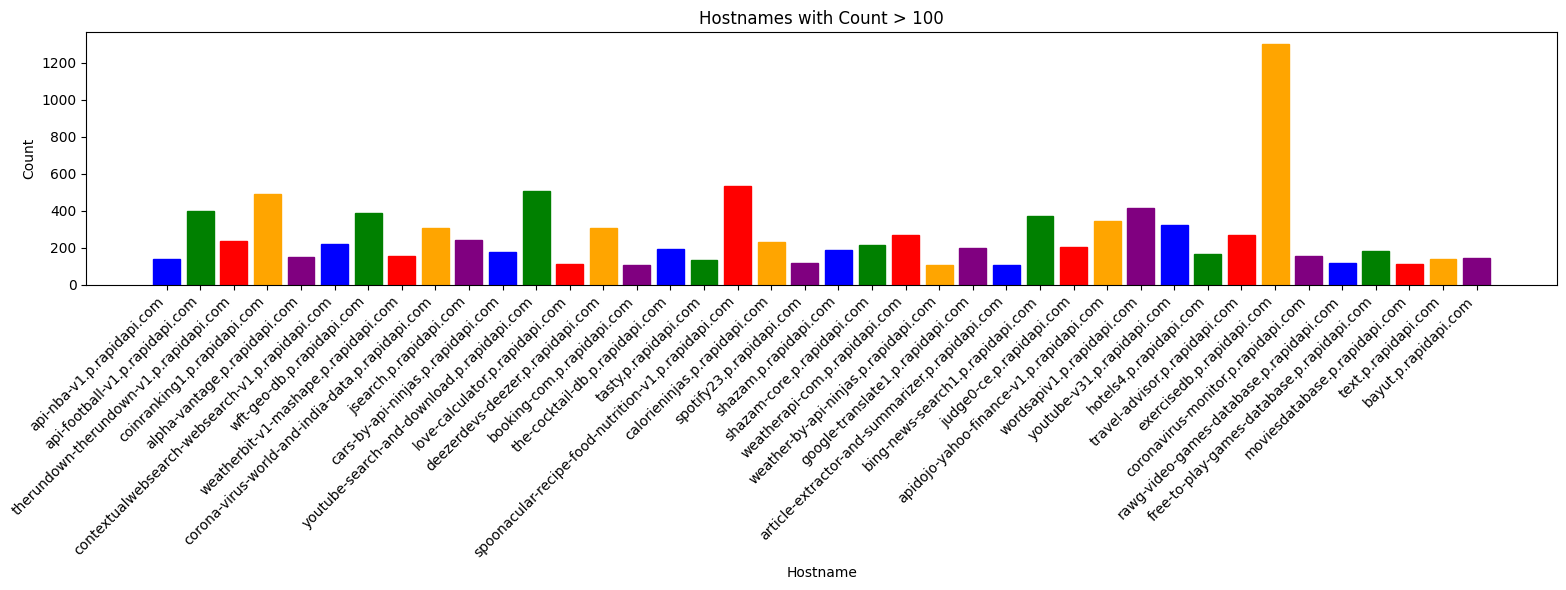

In [14]:
import re
import mysql.connector
from urllib.parse import urlparse
import matplotlib.pyplot as plt

api_info = {}
api_details = {}

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()
select_query = "SELECT DISTINCT(hostname), hostname_count FROM github_info WHERE hostname_count > 100;"

cursor.execute(select_query)

results = cursor.fetchall()

# Get the column names
column_names = [desc[0] for desc in cursor.description]

# Close the database connection
cnx.close()

# Extract the hostnames and counts from the results
hostnames = [result[0] for result in results]
counts = [result[1] for result in results]

# Plotting the graph
plt.figure(figsize=(16, 6))  # Set the figure size to make it wider
bars = plt.bar(hostnames, counts)

# Customize colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])

plt.xlabel('Hostname')
plt.ylabel('Count')
plt.title('Hostnames with Count > 100')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels
plt.tight_layout()  # Ensures proper spacing and layout
plt.show()


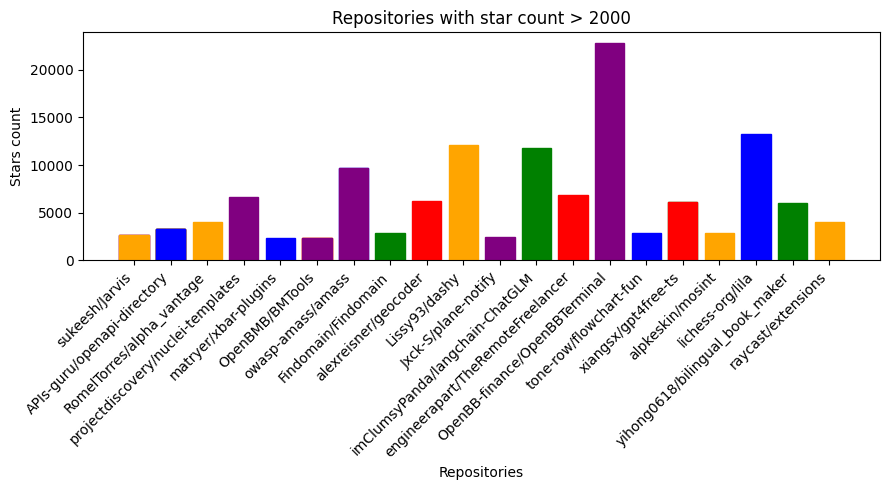

In [47]:
import re
import mysql.connector
from urllib.parse import urlparse
import matplotlib.pyplot as plt

api_info = {}
api_details = {}

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()
select_query = "SELECT repository_name, stars FROM github_details WHERE stars > 2000;"

cursor.execute(select_query)

results = cursor.fetchall()

# Get the column names
column_names = [desc[0] for desc in cursor.description]

# Close the database connection
cnx.close()

# Extract the hostnames and counts from the results
hostnames = [result[0].replace('https://github.com/', '') for result in results]
counts = [result[1] for result in results]

# Plotting the graph
plt.figure(figsize=(9, 5))  # Set the figure size to make it wider
bars = plt.bar(hostnames, counts)

# Customize colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])

plt.xlabel('Repositories')
plt.ylabel('Stars count')
plt.title('Repositories with star count > 2000')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels
plt.tight_layout()  # Ensures proper spacing and layout
plt.show()


C:\Users\siddh\AppData\Local\Temp\ipykernel_2240\937820555.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  query_result = query_result.append({'popularity': 8.9, 'repository_count': 0}, ignore_index=True)


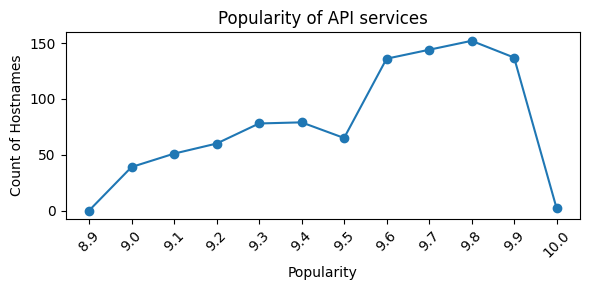

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Execute SQL query
select_query = "SELECT popularity, COUNT(*) as repository_count FROM api_info WHERE popularity > 8.9 AND hostname IN (SELECT DISTINCT hostname FROM github_info WHERE hostname_count > 0) GROUP BY popularity"
cursor.execute(select_query)

# Fetch data into a DataFrame
query_result = pd.DataFrame(cursor.fetchall(), columns=['popularity', 'repository_count'])

# Close database connection
cursor.close()
cnx.close()

# Add a data point to start the curve from the first point
query_result = query_result.append({'popularity': 8.9, 'repository_count': 0}, ignore_index=True)

# Sort the DataFrame by popularity for proper plotting
query_result = query_result.sort_values(by='popularity')

# Plotting
plt.figure(figsize=(6, 3))
plt.plot(query_result['popularity'], query_result['repository_count'], marker='o')
plt.xlabel('Popularity')
plt.ylabel('Count of Hostnames')

plt.title('Popularity of API services')
plt.xticks(rotation=45)
plt.xticks(query_result['popularity'])  # Set custom x-axis ticks
plt.tight_layout()  # To prevent label cutoff
plt.show()


C:\Users\siddh\AppData\Local\Temp\ipykernel_2240\56865416.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  query_result = query_result.append({'popularity': 8.9, 'repository_count': 0}, ignore_index=True)


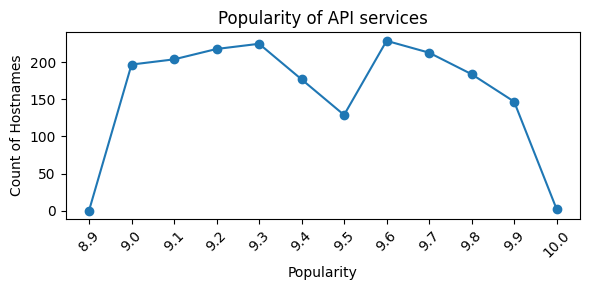

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Execute SQL query
select_query = "SELECT popularity, COUNT(*) as repository_count FROM api_info WHERE popularity > 8.9 GROUP BY popularity"
cursor.execute(select_query)

# Fetch data into a DataFrame
query_result = pd.DataFrame(cursor.fetchall(), columns=['popularity', 'repository_count'])

# Close database connection
cursor.close()
cnx.close()

# Add a data point to start the curve from the first point
query_result = query_result.append({'popularity': 8.9, 'repository_count': 0}, ignore_index=True)

# Sort the DataFrame by popularity for proper plotting
query_result = query_result.sort_values(by='popularity')

# Plotting
plt.figure(figsize=(6, 3))
plt.plot(query_result['popularity'], query_result['repository_count'], marker='o')
plt.xlabel('Popularity')
plt.ylabel('Count of Hostnames')

plt.title('Popularity of API services')
plt.xticks(rotation=45)
plt.xticks(query_result['popularity'])  # Set custom x-axis ticks
plt.tight_layout()  # To prevent label cutoff
plt.show()


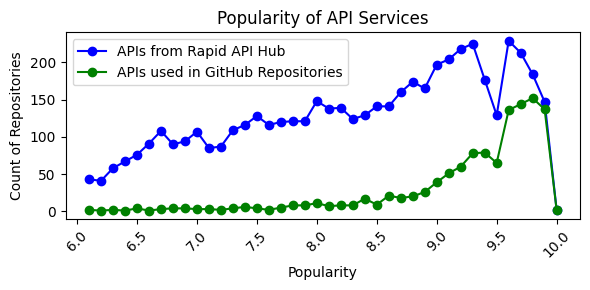

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Execute SQL queries
query1 = "SELECT popularity, COUNT(*) as repository_count FROM api_info WHERE popularity > 6 GROUP BY popularity"
query2 = "SELECT popularity, COUNT(*) as repository_count FROM api_info WHERE popularity > 6 AND hostname IN (SELECT DISTINCT hostname FROM github_info WHERE hostname_count > 0) GROUP BY popularity"

cursor.execute(query1)
results_query1 = cursor.fetchall()

cursor.execute(query2)
results_query2 = cursor.fetchall()

# Close database connection
cursor.close()
cnx.close()

# Create DataFrames from query results
df_query1 = pd.DataFrame(results_query1, columns=['popularity', 'repository_count_1'])
df_query2 = pd.DataFrame(results_query2, columns=['popularity', 'repository_count_2'])

# Merge DataFrames on 'popularity' column
merged_df = df_query1.merge(df_query2, on='popularity', how='outer')

# Sort the merged DataFrame by popularity for proper plotting
merged_df = merged_df.sort_values(by='popularity')

# Plotting
plt.figure(figsize=(6, 3))
plt.plot(merged_df['popularity'], merged_df['repository_count_1'], marker='o', color='blue', label='APIs from Rapid API Hub')
plt.plot(merged_df['popularity'], merged_df['repository_count_2'], marker='o', color='green', label='APIs used in GitHub Repositories')
plt.xlabel('Popularity')
plt.ylabel('Count of Repositories')
plt.title('Popularity of API Services')
plt.xticks(rotation=45)
plt.legend(loc='upper left')  # Set legend position to top-right
plt.tight_layout()  # To prevent label cutoff
plt.show()


C:\Users\siddh\AppData\Local\Temp\ipykernel_6508\3593407893.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_query1 = pd.read_sql_query(query1, cnx)
C:\Users\siddh\AppData\Local\Temp\ipykernel_6508\3593407893.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_query2 = pd.read_sql_query(query2, cnx)
C:\Users\siddh\AppData\Local\Temp\ipykernel_6508\3593407893.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_query3 = pd.read_sql_query(query3, cnx)


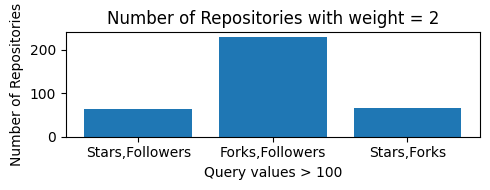

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

# Query 1
query1 = """
SELECT distinct gd1.repository_name
FROM github_details gd1
WHERE gd1.stars > 100
AND EXISTS (
    SELECT 1
    FROM user_info gd2
    WHERE gd2.followers > 100
    AND gd1.repository_name LIKE CONCAT(SUBSTRING(gd2.repo_url, 1, LENGTH(gd1.repository_name) - LENGTH(SUBSTRING_INDEX(gd1.repository_name, '/', -1))), '%')
);
"""

# Query 2
query2 = """
SELECT distinct gd1.repository_name
FROM github_details gd1
WHERE gd1.forks > 100
AND EXISTS (
    SELECT 1
    FROM user_info gd2
    WHERE gd2.followers > 100
    AND gd1.repository_name LIKE CONCAT(SUBSTRING(gd2.repo_url, 1, LENGTH(gd1.repository_name) - LENGTH(SUBSTRING_INDEX(gd1.repository_name, '/', -1))), '%')
);
"""

# Query 3
query3 = """
SELECT distinct repository_name
FROM github_details
WHERE stars > 100 AND forks > 100;
"""

# Fetch data into DataFrames
df_query1 = pd.read_sql_query(query1, cnx)
df_query2 = pd.read_sql_query(query2, cnx)
df_query3 = pd.read_sql_query(query3, cnx)

# Close database connection
cnx.close()

# Plotting
plt.figure(figsize=(5, 2))

plt.bar(['Stars,Followers', 'Forks,Followers', 'Stars,Forks'],
        [len(df_query1), len(df_query2), len(df_query3)])  # Add a comma here
plt.xlabel('Query values > 100')
plt.ylabel('Number of Repositories')
plt.title('Number of Repositories with weight = 2')
plt.xticks(rotation=0)  # Rotate the labels for better visibility
plt.tight_layout()
plt.show()


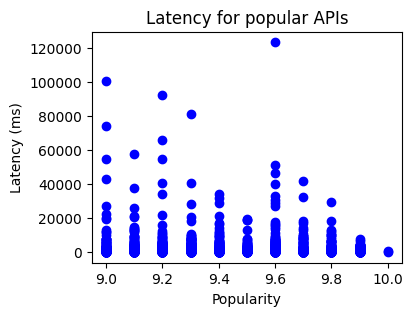

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Execute SQL query
select_query = """
SELECT popularity, latency FROM api_info WHERE popularity > 8.9;
"""

cursor.execute(select_query)

# Fetch data from the executed query
results = cursor.fetchall()

# Close the cursor and connection
cursor.close()
cnx.close()

# Convert the results to Pandas DataFrame
df = pd.DataFrame(results, columns=['popularity', 'latency'])

# Plot the graph using Matplotlib
plt.figure(figsize=(4, 3))
plt.scatter(df['popularity'], df['latency'], color='blue')
plt.title('Latency for popular APIs')
plt.xlabel('Popularity')
plt.ylabel('Latency (ms)')

# Display the plot
plt.show()


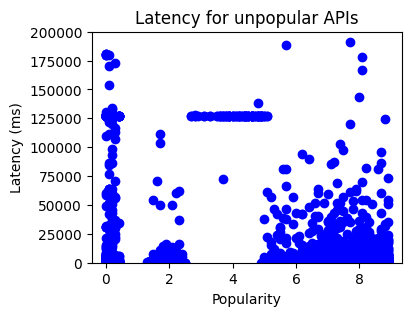

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Execute SQL query
select_query = """
SELECT popularity, latency FROM api_info WHERE popularity < 9;
"""

cursor.execute(select_query)

# Fetch data from the executed query
results = cursor.fetchall()

# Close the cursor and connection
cursor.close()
cnx.close()

# Convert the results to Pandas DataFrame
df = pd.DataFrame(results, columns=['popularity', 'latency'])

# Plot the graph using Matplotlib
plt.figure(figsize=(4, 3))
plt.scatter(df['popularity'], df['latency'], color='blue')
plt.title('Latency for unpopular APIs')
plt.xlabel('Popularity')
plt.ylabel('Latency (ms)')



# Set y-axis limits
plt.ylim(0, 200000)

# Display the plot
plt.show()


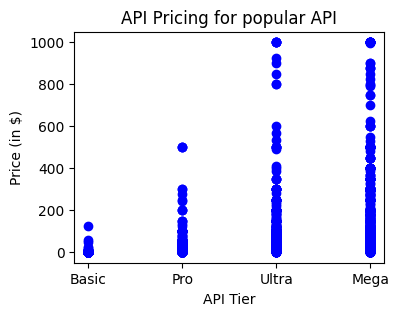

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Execute SQL query
select_query = """
SELECT api_pricing.basic, api_pricing.pro, api_pricing.ultra, api_pricing.mega FROM api_pricing JOIN api_info ON api_pricing.base_url = api_info.base_url WHERE api_info.popularity > 8.9;
"""

# Fetch data from the executed query
cursor.execute(select_query)
results = cursor.fetchall()

# Close the cursor and connection
cursor.close()
cnx.close()

# Convert the results to Pandas DataFrame
df = pd.DataFrame(results, columns=['basic', 'pro', 'ultra', 'mega'])

# Remove rows with any null values
df.dropna(inplace=True)

# Reshape the data for plotting
data = df[['basic', 'pro', 'ultra', 'mega']].values
tiers = ['Basic', 'Pro', 'Ultra', 'Mega']

# Plot the graph using Matplotlib
plt.figure(figsize=(4, 3))
plt.scatter(tiers * len(data), data.flatten(), color='blue')
plt.title('API Pricing for popular API')
plt.xlabel('API Tier')
plt.ylabel('Price (in $)')


# Display the plot
plt.show()


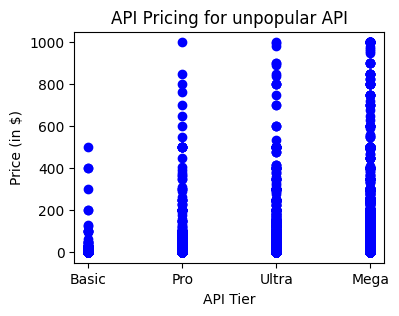

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='root',
    password='xxx',
    database='rapAPI'
)

cursor = cnx.cursor()

# Execute SQL query
select_query = """
SELECT api_pricing.basic, api_pricing.pro, api_pricing.ultra, api_pricing.mega FROM api_pricing JOIN api_info ON api_pricing.base_url = api_info.base_url WHERE api_info.popularity < 9;
"""

# Fetch data from the executed query
cursor.execute(select_query)
results = cursor.fetchall()

# Close the cursor and connection
cursor.close()
cnx.close()

# Convert the results to Pandas DataFrame
df = pd.DataFrame(results, columns=['basic', 'pro', 'ultra', 'mega'])

# Remove rows with any null values
df.dropna(inplace=True)

# Reshape the data for plotting
data = df[['basic', 'pro', 'ultra', 'mega']].values
tiers = ['Basic', 'Pro', 'Ultra', 'Mega']

# Plot the graph using Matplotlib
plt.figure(figsize=(4, 3))
plt.scatter(tiers * len(data), data.flatten(), color='blue')
plt.title('API Pricing for unpopular API')
plt.xlabel('API Tier')
plt.ylabel('Price (in $)')


# Display the plot
plt.show()
